In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm
from astropy.wcs import WCS

## Chandra SNRs

In [5]:
image_g111 = fits.open('../chandra-snrs/data/G111.7-02.1-flux.fits.gz')
image_g292 = fits.open('../chandra-snrs/data/G292.0+01.8-flux.fits.gz')

In [ ]:
def plot_image(ax, hdu):
    

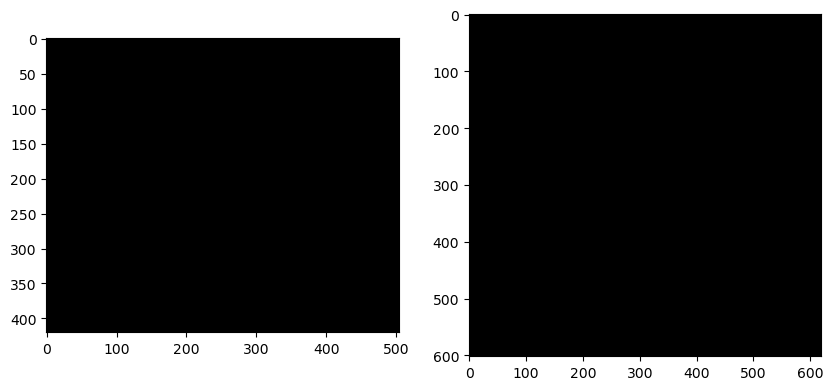

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

norm = simple_norm(image_g111[0].data, stretch='log', min_cut=0.1, max_cut=99.9)
axes[0].imshow(image_g111[0].data, norm=norm, cmap='gray')


norm = simple_norm(image_g292[0].data, stretch='log', min_cut=0.1, max_cut=99.9)
axes[1].imshow(image_g292[0].data, norm=norm, cmap='gray')